# scqubits example: flux qubit
J. Koch and P. Groszkowski

For further documentation of scqubits see https://scqubits.readthedocs.io/en/latest/.

---

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import scqubits as scq

# Flux Qubit

$H_\text{flux}=(n_{i}-n_{gi})4(E_\text{C})_{ij}(n_{j}-n_{gj})
                -E_{J}\cos\phi_{1}-E_{J}\cos\phi_{2}-\alpha E_{J}\cos(2\pi f + \phi_{1} - \phi_{2}),$
                with a sum over $i,j\in\{1,2\}$ implied.

**Creation via GUI** (ipywidgets needs to be installed for this to work.)

In [2]:
flux_qubit = scq.FluxQubit.create()

Output()

**Programmatic creation**

In [3]:
# parameters for the flux qubit
RATIO = 60.0
ALPHA = 0.8

flux_qubit2 = scq.FluxQubit(
    EJ1 = 1.0, 
    EJ2 = 1.0, 
    EJ3 = ALPHA*1.0, 
    ECJ1 = 1.0/RATIO, 
    ECJ2 = 1.0/RATIO, 
    ECJ3 = 1.0/ALPHA/RATIO, 
    ECg1 = 50.0/RATIO, 
    ECg2 = 50.0/RATIO, 
    ng1 = 0.0, 
    ng2 = 0.0, 
    flux = 0.4, 
    ncut = 10,
)

In [4]:
print(flux_qubit)

FluxQubit-----------| [FluxQubit_1]
                    | EJ1: 1.0
                    | EJ2: 1.0
                    | EJ3: 0.8
                    | ECJ1: 0.016
                    | ECJ2: 0.016
                    | ECJ3: 0.021
                    | ECg1: 0.83
                    | ECg2: 0.83
                    | ng1: 0.0
                    | ng2: 0.0
                    | flux: 0.4
                    | ncut: 10
                    | truncated_dim: 10
                    |
                    | dim: 441



**Plot potential energy for flux qubit**

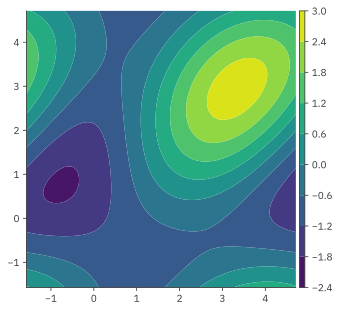

In [5]:
flux_qubit.plot_potential();

## Computing and visualizing spectra

**Eigenenergies**

In [6]:
evals, evecs = flux_qubit.eigensys()

In [7]:
evals

array([-1.60094626, -1.33927211, -1.31303769, -1.10195874, -1.05456892,
       -1.03943899])

Spectral data:   0%|          | 0/40 [00:00<?, ?it/s]

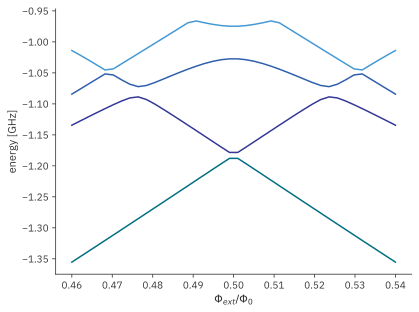

In [8]:
flux_list = np.linspace(.46, .54, 40)
flux_qubit.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False);

**Eigenfunctions**

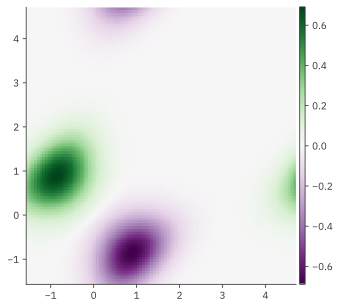

In [9]:
flux_qubit.flux = 0.5
esys = flux_qubit.eigensys()
flux_qubit.plot_wavefunction(esys, which=1, mode='real');

**Matrix elements**

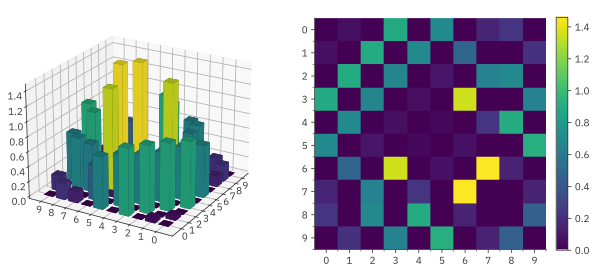

In [10]:
flux_qubit.plot_matrixelements('n_1_operator', evals_count=10);

Spectral data:   0%|          | 0/40 [00:00<?, ?it/s]

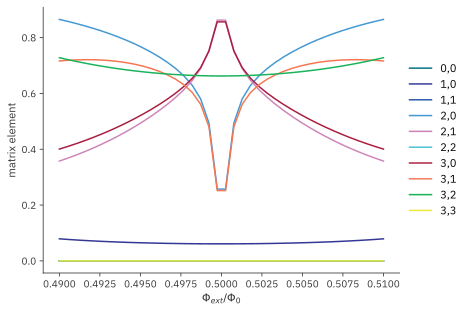

In [11]:
flux_list = np.linspace(.49, .51, 40)
flux_qubit.plot_matelem_vs_paramvals('n_1_operator', 'flux', flux_list);